In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data into dataframe

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INS Malicious url detector/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


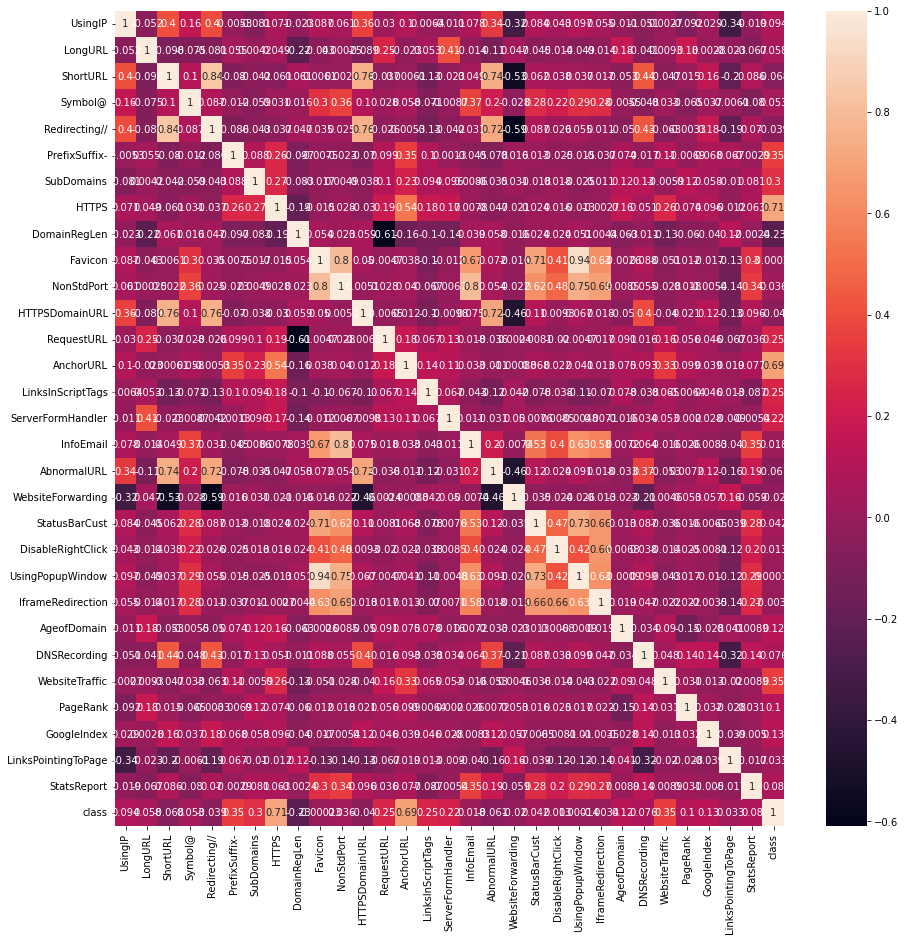

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

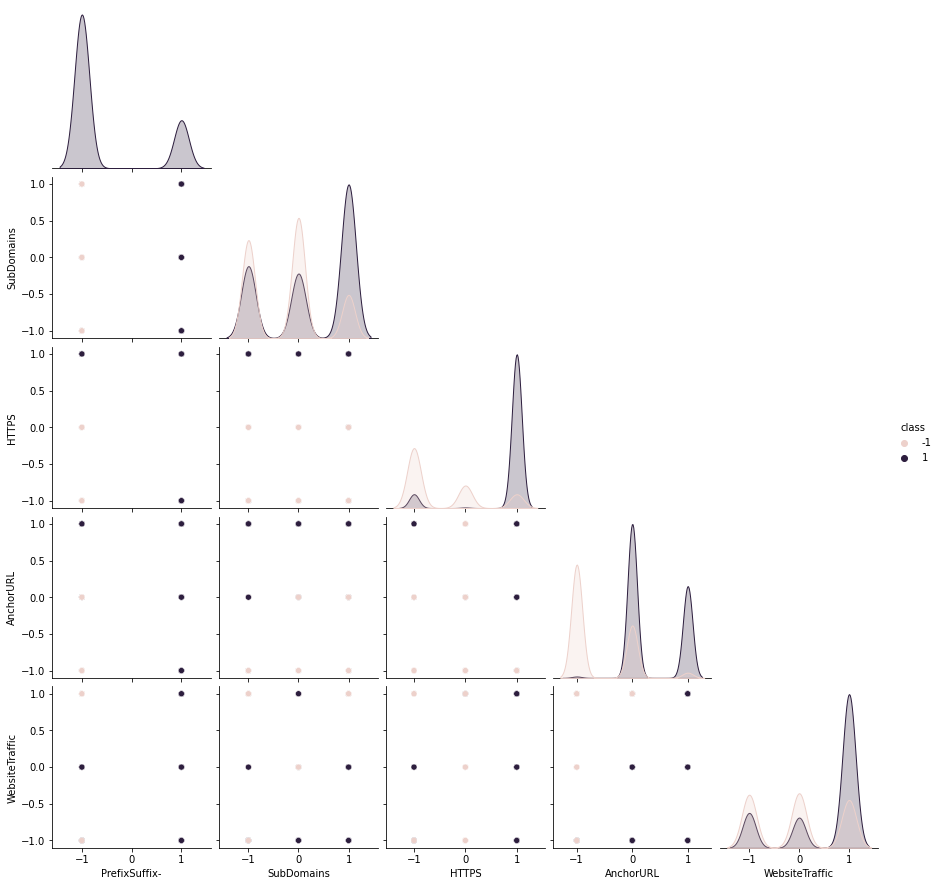

In [10]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);

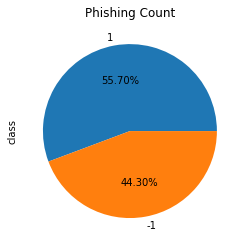

In [11]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [12]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [13]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [14]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [15]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [17]:
# computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [18]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [19]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [20]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier()

In [21]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [22]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.952
XGBoost Classifier : Accuracy on test Data: 0.952

XGBoost Classifier : f1_score on training Data: 0.957
XGBoost Classifier : f1_score on test Data: 0.958

XGBoost Classifier : Recall on training Data: 0.968
XGBoost Classifier : Recall on test Data: 0.968

XGBoost Classifier : precision on training Data: 0.947
XGBoost Classifier : precision on test Data: 0.947


In [23]:
storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [24]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [25]:
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [26]:

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.987
Multi-layer Perceptron : Accuracy on test Data: 0.969

Multi-layer Perceptron : f1_score on training Data: 0.988
Multi-layer Perceptron : f1_score on test Data: 0.988

Multi-layer Perceptron : Recall on training Data: 0.995
Multi-layer Perceptron : Recall on test Data: 0.984

Multi-layer Perceptron : precision on training Data: 0.983
Multi-layer Perceptron : precision on test Data: 0.961


In [27]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [28]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [29]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [30]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [31]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [32]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [33]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,XGBoost Classifier,0.952,0.958,0.968,0.947
2,Multi-layer Perceptron,0.969,0.972,0.995,0.983
3,Gradient Boosting Classifier,0.974,0.977,0.994,0.986


In [34]:
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [35]:
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,Multi-layer Perceptron,0.969,0.972,0.995,0.983
2,XGBoost Classifier,0.952,0.958,0.968,0.947
3,Logistic Regression,0.934,0.941,0.943,0.927


In [36]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [37]:
# gbc.predict("http://www.waukeshaconcrete.com/an/ayo1/index.html")

In [40]:
import pickle

# dump information to that file
pickle.dump(gbc, open('model.pkl', 'wb'))

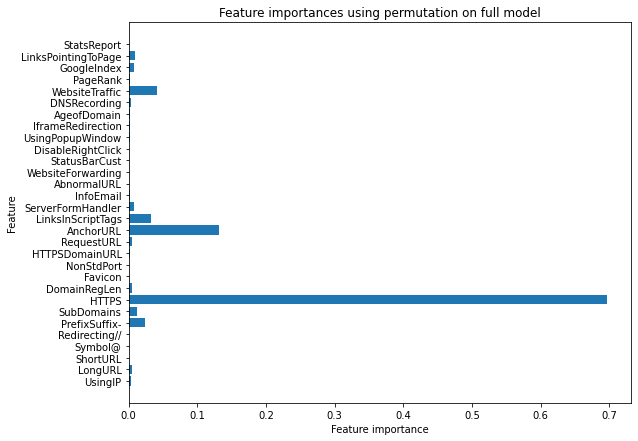

In [41]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [42]:
# Conclusion
# The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features.
# Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
# The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not.
# Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.

In [44]:
pip install whois


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for whois: filename=whois-0.9.19-py3-none-any.whl size=23602 sha256=cfbc1af673b10cd407ffde6bdde3a466a551a923898acd338223c5bd183fe43d
  Stored in directory: /root/.cache/pip/wheels/82/a3/cd/a50a09d0cad2fa66eff6755f734f8afa4f1792ae373219b624
Successfully built whois


In [45]:
import ipaddress
import re
import urllib.request
from bs4 import BeautifulSoup
import socket
import requests
from googlesearch import search
import whois
from datetime import date, datetime
import time
from dateutil.parser import parse as date_parse
from urllib.parse import urlparse

class FeatureExtraction:
    features = []
    def __init__(self,url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(response.text, 'html.parser')
        except:
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except:
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except:
            pass


        

        self.features.append(self.UsingIp())
        self.features.append(self.longUrl())
        self.features.append(self.shortUrl())
        self.features.append(self.symbol())
        self.features.append(self.redirecting())
        self.features.append(self.prefixSuffix())
        self.features.append(self.SubDomains())
        self.features.append(self.Hppts())
        self.features.append(self.DomainRegLen())
        self.features.append(self.Favicon())
        

        self.features.append(self.NonStdPort())
        self.features.append(self.HTTPSDomainURL())
        self.features.append(self.RequestURL())
        self.features.append(self.AnchorURL())
        self.features.append(self.LinksInScriptTags())
        self.features.append(self.ServerFormHandler())
        self.features.append(self.InfoEmail())
        self.features.append(self.AbnormalURL())
        self.features.append(self.WebsiteForwarding())
        self.features.append(self.StatusBarCust())

        self.features.append(self.DisableRightClick())
        self.features.append(self.UsingPopupWindow())
        self.features.append(self.IframeRedirection())
        self.features.append(self.AgeofDomain())
        self.features.append(self.DNSRecording())
        self.features.append(self.WebsiteTraffic())
        self.features.append(self.PageRank())
        self.features.append(self.GoogleIndex())
        self.features.append(self.LinksPointingToPage())
        self.features.append(self.StatsReport())


     # 1.UsingIp
    def UsingIp(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except:
            return 1

    # 2.longUrl
    def longUrl(self):
        if len(self.url) < 54:
            return 1
        if len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3.shortUrl
    def shortUrl(self):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', self.url)
        if match:
            return -1
        return 1

    # 4.Symbol@
    def symbol(self):
        if re.findall("@",self.url):
            return -1
        return 1
    
    # 5.Redirecting//
    def redirecting(self):
        if self.url.rfind('//')>6:
            return -1
        return 1
    
    # 6.prefixSuffix
    def prefixSuffix(self):
        try:
            match = re.findall('\-', self.domain)
            if match:
                return -1
            return 1
        except:
            return -1
    
    # 7.SubDomains
    def SubDomains(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8.HTTPS
    def Hppts(self):
        try:
            https = self.urlparse.scheme
            if 'https' in https:
                return 1
            return -1
        except:
            return 1

    # 9.DomainRegLen
    def DomainRegLen(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            try:
                if(len(expiration_date)):
                    expiration_date = expiration_date[0]
            except:
                pass
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            age = (expiration_date.year-creation_date.year)*12+ (expiration_date.month-creation_date.month)
            if age >=12:
                return 1
            return -1
        except:
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or domain in head.link['href']:
                        return 1
            return -1
        except:
            return -1

    # 11. NonStdPort
    def NonStdPort(self):
        try:
            port = self.domain.split(":")
            if len(port)>1:
                return -1
            return 1
        except:
            return -1

    # 12. HTTPSDomainURL
    def HTTPSDomainURL(self):
        try:
            if 'https' in self.domain:
                return -1
            return 1
        except:
            return -1
    
    # 13. RequestURL
    def RequestURL(self):
        try:
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for audio in self.soup.find_all('audio', src=True):
                dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
                if self.url in audio['src'] or self.domain in audio['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for embed in self.soup.find_all('embed', src=True):
                dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
                if self.url in embed['src'] or self.domain in embed['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for iframe in self.soup.find_all('iframe', src=True):
                dots = [x.start(0) for x in re.finditer('\.', iframe['src'])]
                if self.url in iframe['src'] or self.domain in iframe['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success/float(i) * 100
                if percentage < 22.0:
                    return 1
                elif((percentage >= 22.0) and (percentage < 61.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1
    
    # 14. AnchorURL
    def AnchorURL(self):
        try:
            i,unsafe = 0,0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (url in a['href'] or self.domain in a['href']):
                    unsafe = unsafe + 1
                i = i + 1

            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif ((percentage >= 31.0) and (percentage < 67.0)):
                    return 0
                else:
                    return -1
            except:
                return -1

        except:
            return -1

    # 15. LinksInScriptTags
    def LinksInScriptTags(self):
        try:
            i,success = 0,0
        
            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif((percentage >= 17.0) and (percentage < 81.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 16. ServerFormHandler
    def ServerFormHandler(self):
        try:
            if len(self.soup.find_all('form', action=True))==0:
                return 1
            else :
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except:
            return -1

    # 17. InfoEmail
    def InfoEmail(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soap):
                return -1
            else:
                return 1
        except:
            return -1

    # 18. AbnormalURL
    def AbnormalURL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except:
            return -1

    # 19. WebsiteForwarding
    def WebsiteForwarding(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except:
             return -1

    # 20. StatusBarCust
    def StatusBarCust(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 21. DisableRightClick
    def DisableRightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 22. UsingPopupWindow
    def UsingPopupWindow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 23. IframeRedirection
    def IframeRedirection(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 24. AgeofDomain
    def AgeofDomain(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 25. DNSRecording    
    def DNSRecording(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 26. WebsiteTraffic   
    def WebsiteTraffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
            if (int(rank) < 100000):
                return 1
            return 0
        except :
            return -1

    # 27. PageRank
    def PageRank(self):
        try:
            prank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})

            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except:
            return -1
            

    # 28. GoogleIndex
    def GoogleIndex(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except:
            return 1

    # 29. LinksPointingToPage
    def LinksPointingToPage(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except:
            return -1

    # 30. StatsReport
    def StatsReport(self):
        try:
            url_match = re.search(
        'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except:
            return 1
    
    def getFeaturesList(self):
        return self.features

In [46]:
file = open("model.pkl","rb")
gbc = pickle.load(file)
file.close()

In [114]:
# url = "http://www.waukeshaconcrete.com/an/ayo1/index.html"  # (unsafe)
# url ="https://colab.research.google.com/drive/1tkjjXMTvbyIlPgKRCQ_r5nZexTfseG2A#scrollTo=-q5foK91jlPQ" # (unsafe)
# url = "https://www.google.com/"  # (safe)
# url = "www.buyfakebillsonlinee.blogspot.com"  # (unsafe)
# url = "www.unitedairlineslogistics.com"  # (unsafe)
# url = "www.stonehousedelivery.com"  # (unsafe)
# url = "www.silkroadmeds-onlinepharmacy.com"  # (unsafe)
# url = "https://www.flipkart.com/" # (unsafe)
# url = "http://www.fyccenter.com/drive/auth/view/share/index.html" (unsafe)
# url = "http://www.spit.ac.in/" (Safe but detected unsafe)
# url = "https://drive.google.com/drive/u/0/folders/1oJgPhJiHf_gE5GtdTZBFvMP3qxWOCI5l" (safe)
# url = "http://btc8886.com/"  # (unsafe)
# url = "http://mubayiro.de/start_1173.html" # (unsafe)
# url ="https://video3w.com/1672398362" # (safe)

obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 

y_pred =gbc.predict(x)[0]
#1 is safe       
# -1 is unsafe


y_pro_phishing = gbc.predict_proba(x)[0,0]
y_pro_non_phishing = gbc.predict_proba(x)[0,1]
print(y_pred)
print(y_pro_phishing)
print(y_pro_non_phishing)
if y_pred :
   pred = f"It is {y_pro_non_phishing*100} % safe to go and {y_pro_phishing*100} % unsafe to go  "
   print(pred)

safe = y_pro_non_phishing*100
unsafe = y_pro_phishing*100

if safe > unsafe:
  print("This URL is Safe")
else:
  print("This URL is Unsafe")

1
0.0009316380850931116
0.9990683619149069
It is 99.90683619149068 % safe to go and 0.09316380850931116 % unsafe to go  
This URL is Safe
